In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df['pixel1'].nunique()

1

In [7]:
for i in range(0,783):
    pixel = 'pixel' + str(i)
    if df[pixel].nunique() == 1:
        df.drop(pixel,axis=1, inplace=True)


In [8]:
len(df.columns)

710

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras.layers import Dense, Dropout

In [11]:
# need to use a multi-class activation function...
# end of the network will have 10 nodes (0-9)
# output layer nodes will use the softmax function

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
labels = pd.get_dummies(df['label'])

In [15]:
X = df.drop('label',axis = 1).values
y = labels.values

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [77]:
X_train = scaler.fit_transform(X_train)

In [78]:
X_test = scaler.transform(X_test)

In [79]:
model = Sequential()

model.add(Dense(709, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(355, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(178, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(89, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(45, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [80]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 25)

In [81]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
        callbacks=[early_stop])

Train on 37800 samples, validate on 4200 samples
Epoch 1/600
37800/37800 [==============================] - 15s 399us/sample - loss: 0.0674 - val_loss: 0.0317
Epoch 2/600
37800/37800 [==============================] - 16s 421us/sample - loss: 0.0321 - val_loss: 0.0258
Epoch 3/600
37800/37800 [==============================] - 14s 381us/sample - loss: 0.0247 - val_loss: 0.0259
Epoch 4/600
37800/37800 [==============================] - 15s 404us/sample - loss: 0.0218 - val_loss: 0.0217
Epoch 5/600
37800/37800 [==============================] - 15s 400us/sample - loss: 0.0181 - val_loss: 0.0204
Epoch 6/600
37800/37800 [==============================] - 15s 398us/sample - loss: 0.0158 - val_loss: 0.0237
Epoch 7/600
37800/37800 [==============================] - 15s 400us/sample - loss: 0.0142 - val_loss: 0.0194
Epoch 8/600
37800/37800 [==============================] - 17s 455us/sample - loss: 0.0132 - val_loss: 0.0212
Epoch 9/600
37800/37800 [==============================] - 17s 453us/sa

In [82]:
model_loss = pd.DataFrame(model.history.history)

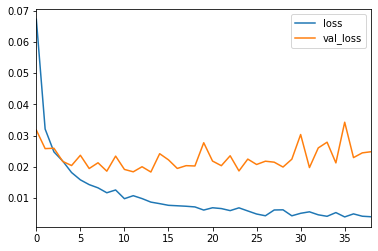

In [83]:
model_loss.plot()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
from tensorflow.keras.models import load_model

In [84]:
model.save('digit_recognizer2.h5')

In [37]:
test = pd.read_csv('test.csv')

In [44]:
for column in test.columns:
    if column in df.columns:
        pass
    else:
        test.drop(column, axis=1, inplace=True)

In [52]:
test = test.values

In [85]:
predictions = model.predict_classes(test)

In [86]:
predictions = pd.DataFrame(predictions)

In [87]:
predictions.columns = ['Label']

In [88]:
predictions['ImageId'] = predictions.index

In [89]:
predictions.set_index('ImageId', inplace=True)

In [90]:
predictions['ImageId'] = predictions.index+1

In [91]:
predictions.drop('ImageId', axis = 1, inplace=True)

In [92]:
predictions.index = predictions.index+1

In [93]:
predictions.to_csv('predictions')